In [ ]:
include("SpinGlassCore_3d.jl")
using .SpinGlassCore
include("../../logger/logger.jl")
using .MyLogger
using Optimisers, Logging, LinearAlgebra, Distributions, Statistics, StatsBase, Random, ProgressMeter
using CairoMakie

# seed = 42
# Random.seed!(seed)

init_logger(dir="../../logs", level=:Info)
println(names(SpinGlassCore))

[:SpinGlassCore, :calc_acceptance_and_rtt, :calc_energy, :initial_state, :metropolis_sampler, :score_method]


In [ ]:
N = 8
M = 20

@info """
Hyperparameters of Gaussian model:
--------------------
system size: $(N*N),
the number of replica: $M
"""
println("Set hyperparameters.")

Set hyperparameters.


In [3]:
function create_biased_couplings(N, p)
    signs = 2 .* rand(Bernoulli(p), N, N, N) .- 1
    magnitudes = abs.(randn(N, N, N))
    return signs .* magnitudes
end

create_biased_couplings (generic function with 1 method)

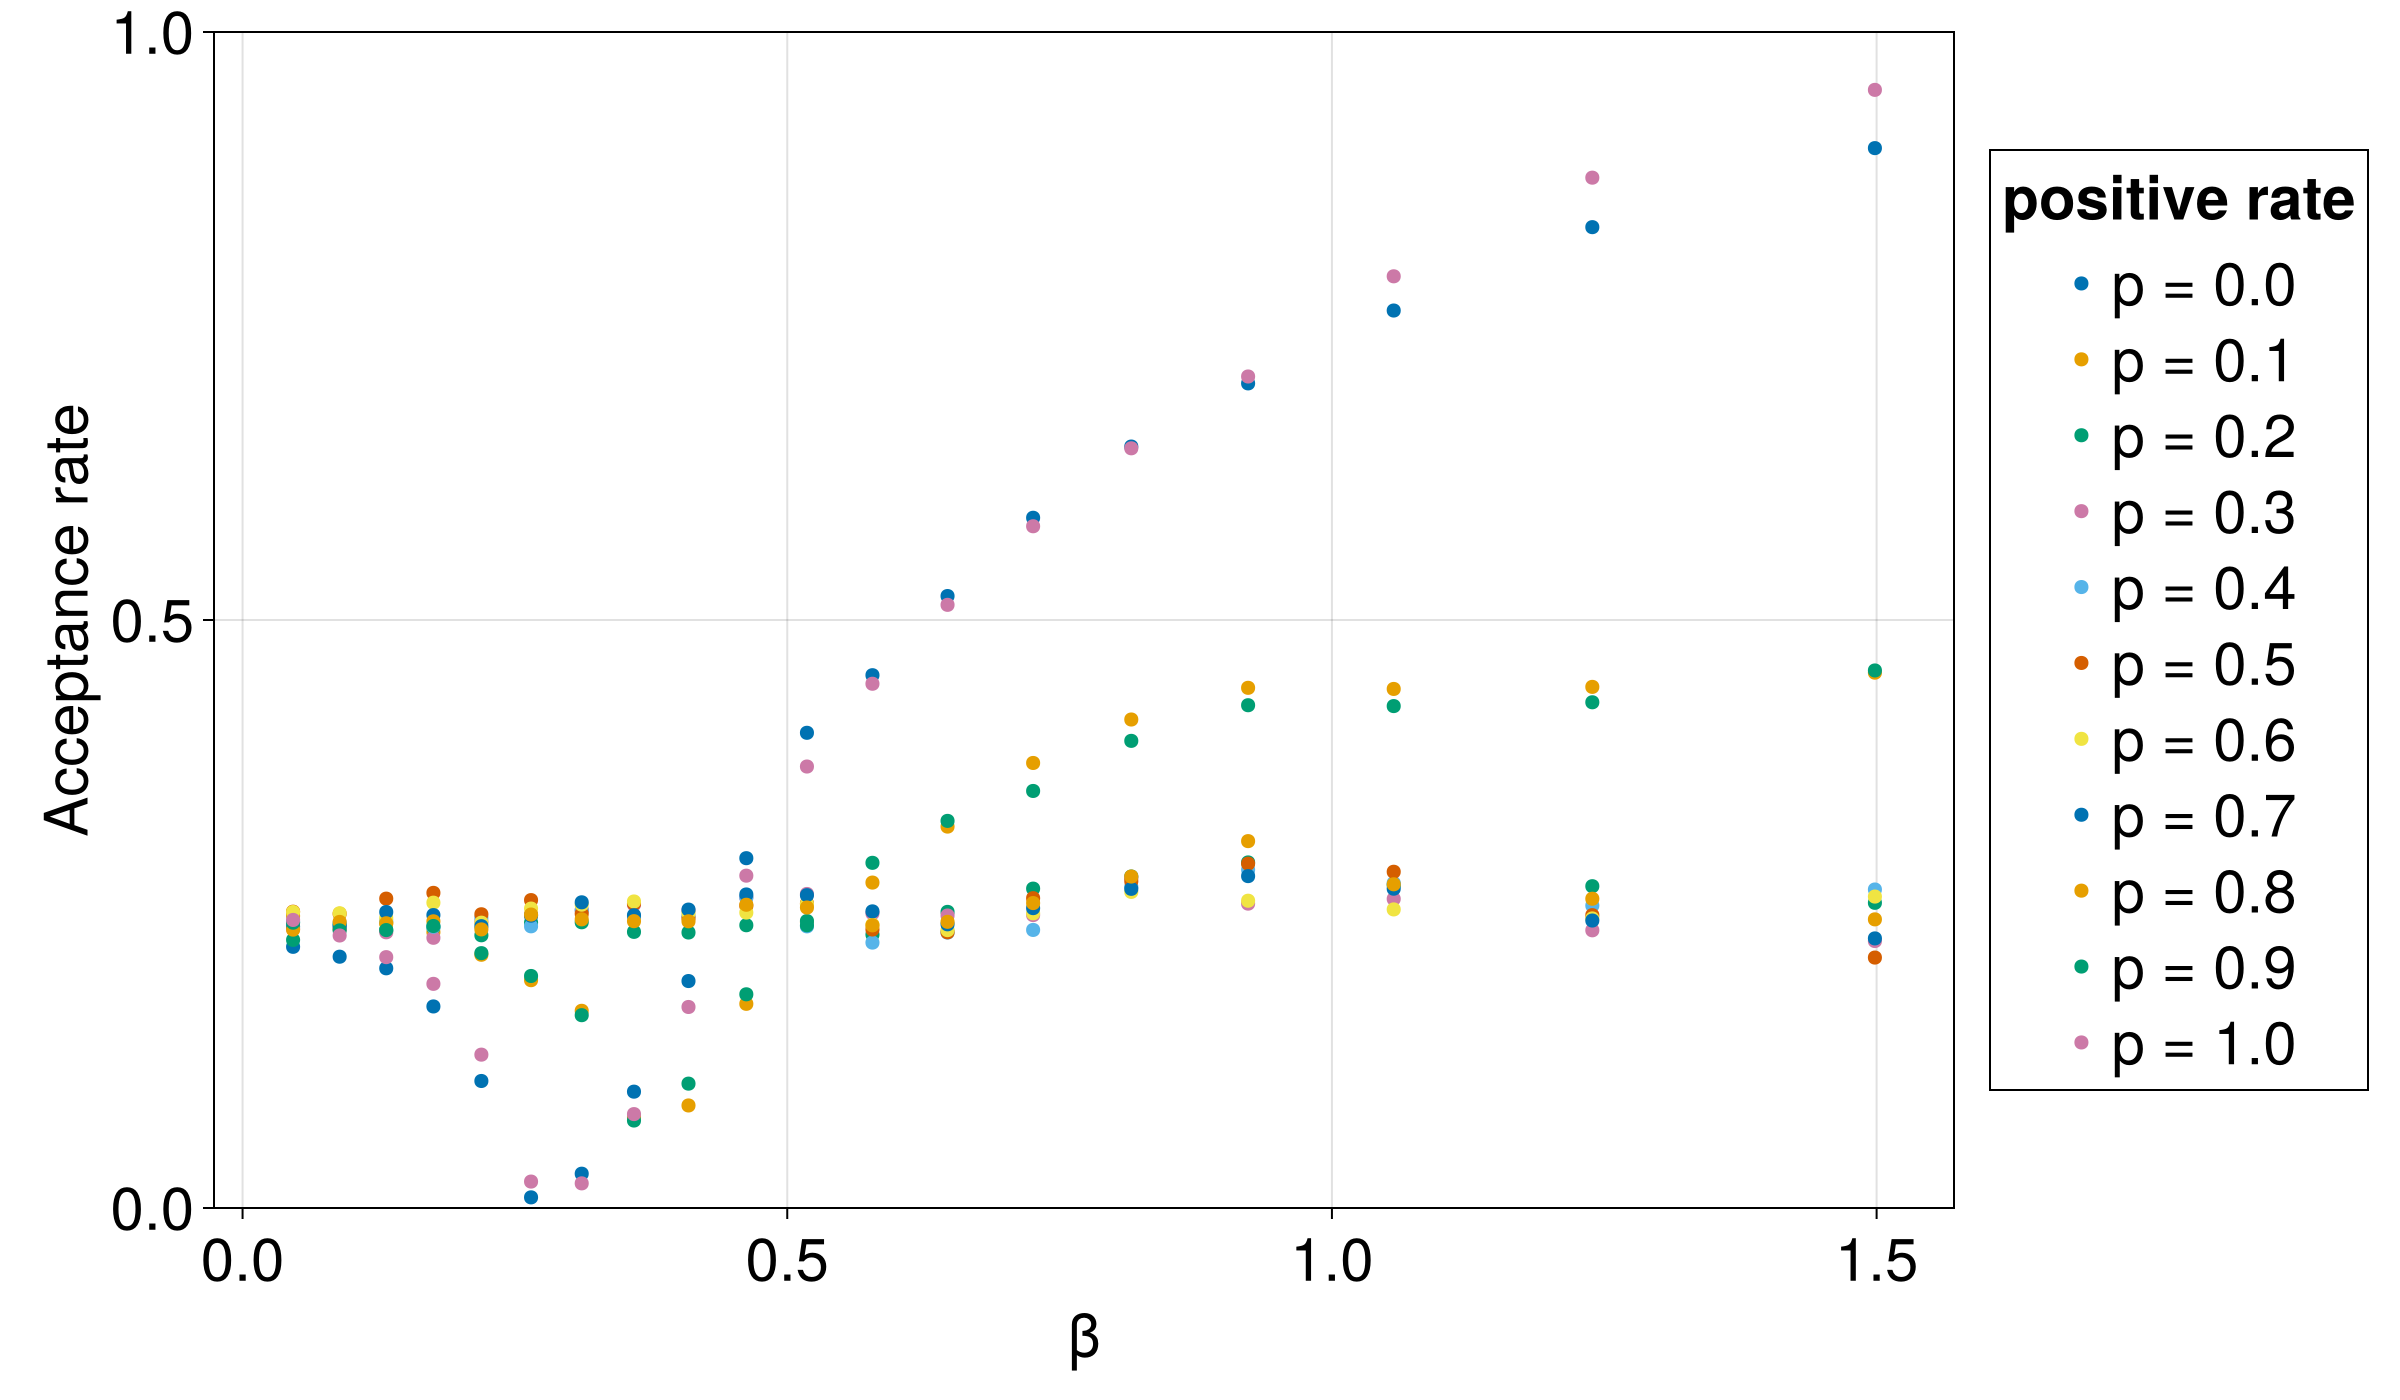

CairoMakie.Screen{IMAGE}


In [11]:
optimal_β_ladder = [0.04637974303856932, 0.08911569265681538, 0.131881867355154, 0.1751897697294175, 0.2192223514289654, 0.26482473397183715, 0.3113286548938571, 0.3593087735175781, 0.4093502963093775, 0.46243510053762077, 0.5180829471816236, 0.5782182390931703, 0.6471490210116588, 0.725708477037973, 0.8158184261336104, 0.9230535353743115, 1.056720737740695, 1.2390291680333412, 1.4984369140477953, 1.880176437241186] # Gaussian model

fig1 = Figure(size=(1200, 700), fontsize = 30)
ax1 = fig1[1, 1] = Axis(fig1, xlabel="β", ylabel="Acceptance rate")
ylims!(ax1, 0, 1)
for i in 0:10
    p = i / 10.0
    Jh = create_biased_couplings(N, p)
    Jv = create_biased_couplings(N, p)
    Jz = create_biased_couplings(N, p)
    exchange_prob_means, _ = SpinGlassCore.calc_acceptance_and_rtt(N, optimal_β_ladder, Jh, Jv, Jz)

    @info "p=$p: $exchange_prob_means"
    scatter!(ax1, optimal_β_ladder[1:(end-1)], exchange_prob_means, markersize=10, label="p = $p")
end    
# axislegend()
Legend(fig1[1, 2], ax1, "positive rate")
display(fig1)